In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

In [3]:
df = datasets.load_boston(return_X_y=False)

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [4]:
x = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.DataFrame(df.target, columns=['price'])

In [5]:
y.shape

(506, 1)

In [6]:
df_test = pd.concat((y, x), axis=1)

In [7]:
correlations = df_test.corr()
correlations.style.background_gradient(cmap='Greens')

,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


Variable objetivo: Price

<AxesSubplot:ylabel='Count'>

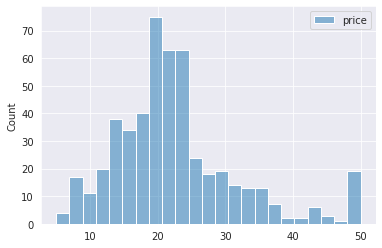

In [8]:
sns.histplot(y)

Entrenar modelo

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
x_train.shape, y_train.shape

((354, 13), (354, 1))

In [11]:
ml = sm.OLS(y_train, sm.add_constant(x_train))
ml_results = ml.fit()

In [12]:
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           4.96e-92
Time:                        22:25:26   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.000      19.720      43.542
CRIM          -0.1335      0.041     -3.271      0.001      -0.214      -0.053
ZN             0.0358      0.018      2.029      0.043       0.001       0.071
INDUS          0.0495      0.073      0.680      0.497      -0.094       0.193
CHAS           3.1198      1.037      3.010      0.003       1.081       5.159
NOX          -15.4171      4.750     -3.246      0.001     -24.759      -6.075
RM             4.0572      0.496      8.181      0.000       3.082       5.033
AGE           -0.0108      0.016     -0.671      0.503      -0.043       0.021
DIS           -1.3860      0.242     -5.734      0.000      -1.861      -0.911
RAD            0.2427      0.082      2.963      0.003       0.082       0.404
TAX           -0.0087      0.005     -1.886      0.060      -0.018       0.000
PTRATIO       -0.9107      0.154     -5.905      0.000      -1.214      -0.607
B              0.0118      0.003      3.534      0.000       0.005       0.018
LSTAT         -0.5471      0.059     -9.219      0.000      -0.664      -0.430
==============================================================================
Omnibus:                      115.779   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.270
Skew:                           1.381   Prob(JB):                    3.08e-100
Kurtosis:                       7.842   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Validación de la regresión

In [13]:
# Valores Ajustados
fitted_values = ml_results.fittedvalues

# Valores residuales
residuals = ml_results.resid

#residuales estandarizados
lm_resid_stand = ml_results.get_influence().resid_studentized_internal

#raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

#residuales absolutos
lm_resid_abs = np.abs(residuals)

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})

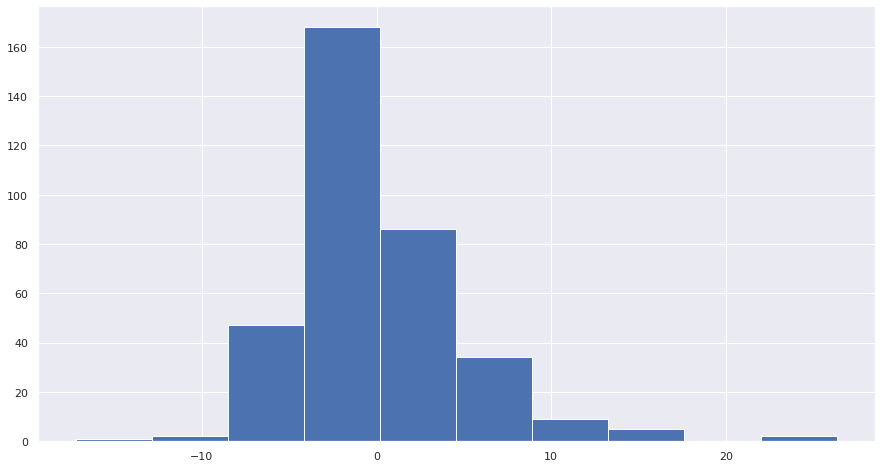

In [15]:
# Residuales
plt.hist(ml_results.resid)
plt.show()

In [21]:
y_pred = ml_results.predict(sm.add_constant(x_test))

In [24]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 21.52


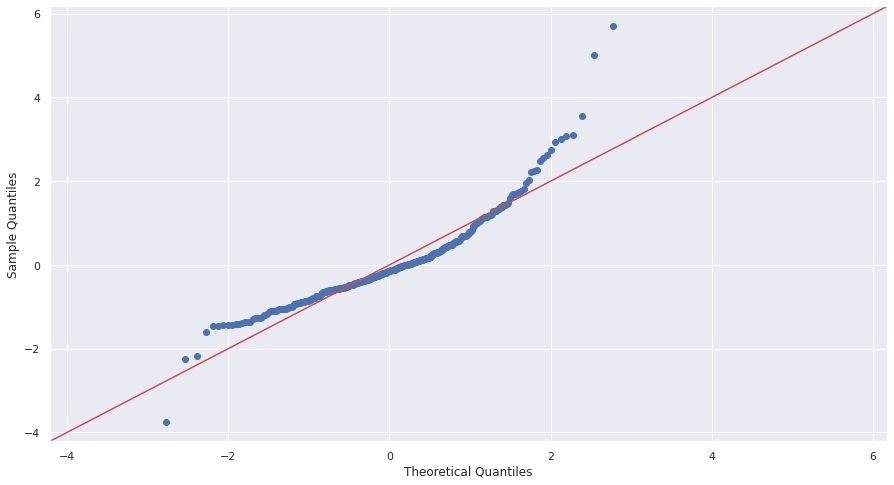

In [28]:
def grafico_qqplot():
    fig = sm.qqplot(lm_resid_stand,line='45')
    plt.show()

grafico_qqplot()

## Residuales vs ajustados

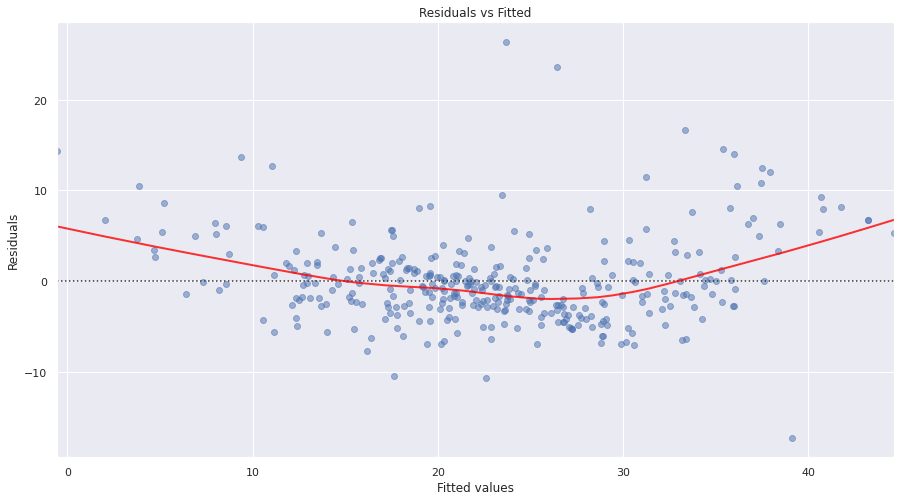

In [29]:
def residuales_vs_ajustados():
    plot = sns.residplot(x=fitted_values, y=residuals, lowess=True,
                         scatter_kws={'alpha': 0.5},
                         line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    # Titel and labels
    plot.set_title('Residuals vs Fitted')
    plot.set_xlabel('Fitted values')
    plot.set_ylabel('Residuals')
residuales_vs_ajustados()

## Scale Location

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 76

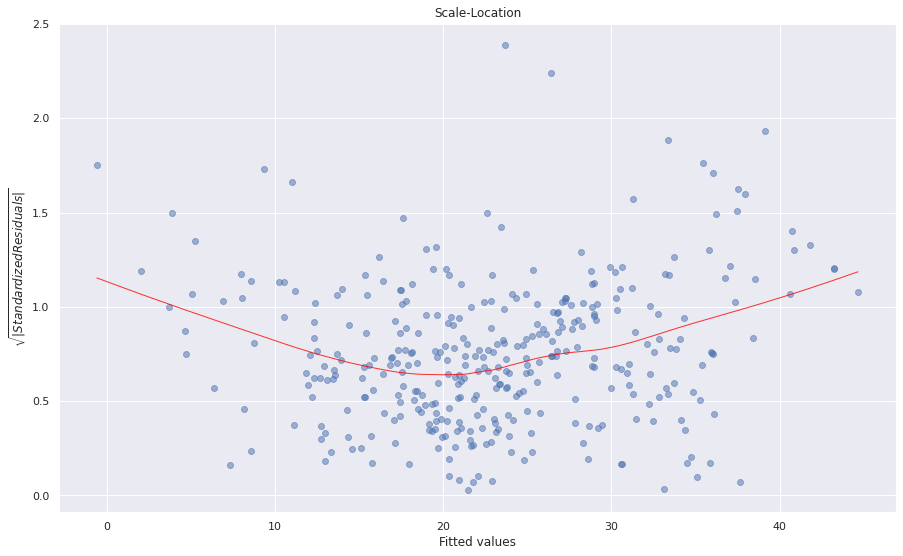

In [30]:
def scale_location():
    plot_lm_3 = plt.figure(figsize=(15,9))
    plt.scatter(fitted_values, lm_resid_norm_abs_sqrt, alpha=0.5)
    sns.regplot(fitted_values, lm_resid_norm_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(lm_resid_norm_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_sq_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(fitted_values[i],
                                   lm_resid_norm_abs_sqrt[i]))
    plt.show()
scale_location()

#### Análisis de variables, no se tendrán en cuenta las variables INDUS Y AGE por p>|t| > 0.05

In [ ]:
# Copia de x para utilizar las variables modificadas

In [11]:
x_v1 = x.copy()

#### CRIM

<AxesSubplot:>

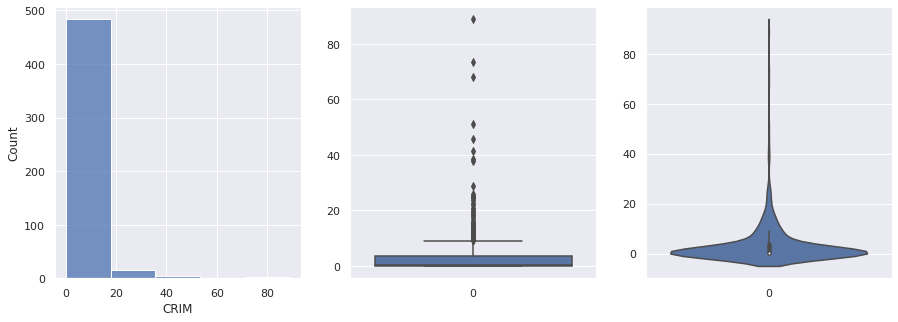

In [41]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.CRIM, bins=5 ,ax=axes[0])
sns.boxplot(data=x.CRIM, ax=axes[1])
sns.violinplot(data=x.CRIM, ax=axes[2])

In [40]:
Q1 = x.CRIM.quantile(0.25)
Q3 = x.CRIM.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.CRIM < BI) | (x.CRIM > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  13.043478260869565


#### ZN

<AxesSubplot:>

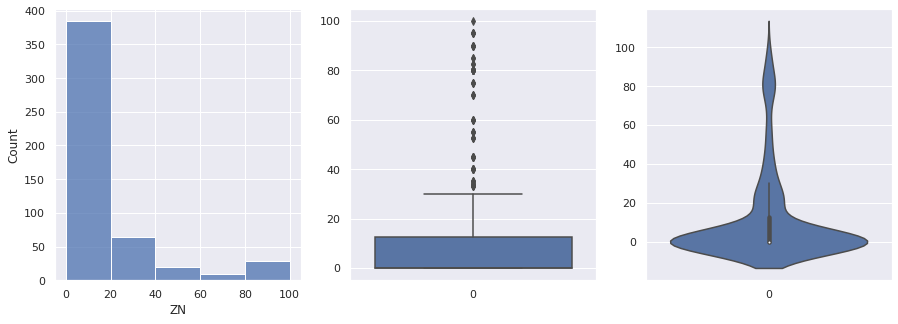

In [17]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.ZN, bins=5 ,ax=axes[0])
sns.boxplot(data=x.ZN, ax=axes[1])
sns.violinplot(data=x.ZN, ax=axes[2])

In [18]:
Q1 = x.ZN.quantile(0.25)
Q3 = x.ZN.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.ZN < BI) | (x.ZN > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  13.438735177865613


#### CHAS

<AxesSubplot:>

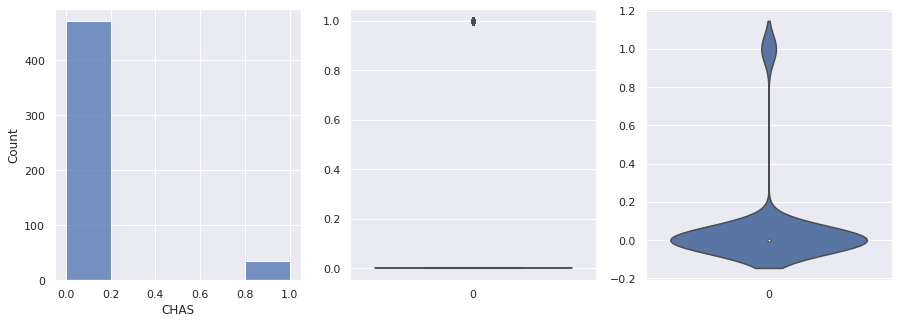

In [19]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.CHAS, bins=5 ,ax=axes[0])
sns.boxplot(data=x.CHAS, ax=axes[1])
sns.violinplot(data=x.CHAS, ax=axes[2])

In [20]:
x.CHAS.describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

#### NOX

<AxesSubplot:>

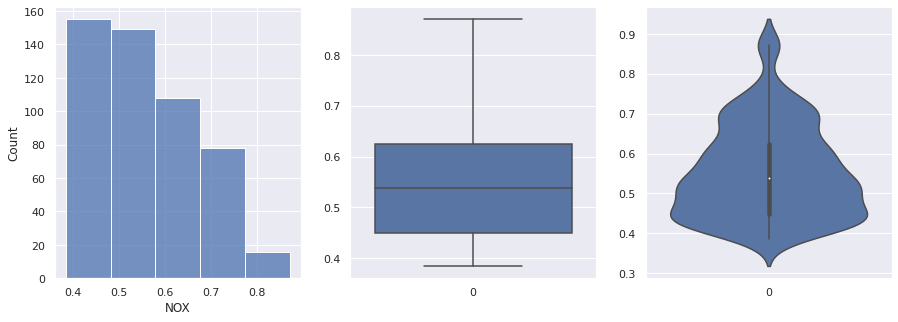

In [21]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.NOX, bins=5 ,ax=axes[0])
sns.boxplot(data=x.NOX, ax=axes[1])
sns.violinplot(data=x.NOX, ax=axes[2])

In [22]:
Q1 = x.NOX.quantile(0.25)
Q3 = x.NOX.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.NOX < BI) | (x.NOX > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.0


#### RM

<AxesSubplot:>

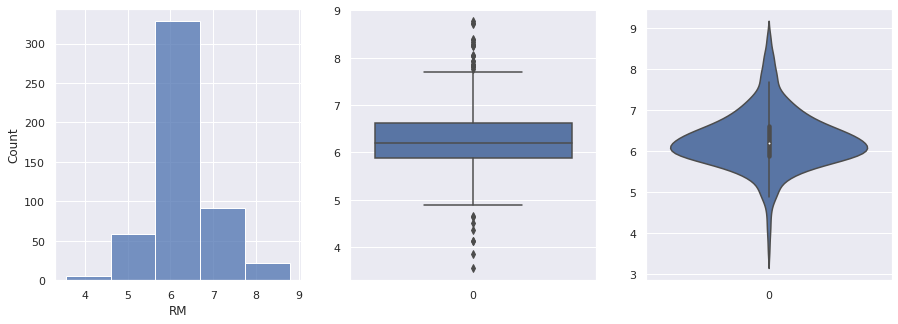

In [23]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.RM, bins=5 ,ax=axes[0])
sns.boxplot(data=x.RM, ax=axes[1])
sns.violinplot(data=x.RM, ax=axes[2])

In [26]:
Q1 = x.RM.quantile(0.25)
Q3 = x.RM.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.RM < BI) | (x.RM > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  5.928853754940712


#### DIS

<AxesSubplot:>

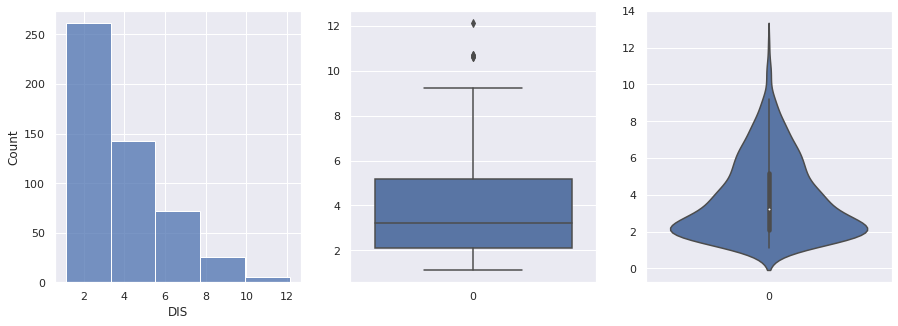

In [27]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.DIS, bins=5 ,ax=axes[0])
sns.boxplot(data=x.DIS, ax=axes[1])
sns.violinplot(data=x.DIS, ax=axes[2])

In [28]:
Q1 = x.DIS.quantile(0.25)
Q3 = x.DIS.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.DIS < BI) | (x.DIS > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  0.9881422924901185


#### RAD

<AxesSubplot:>

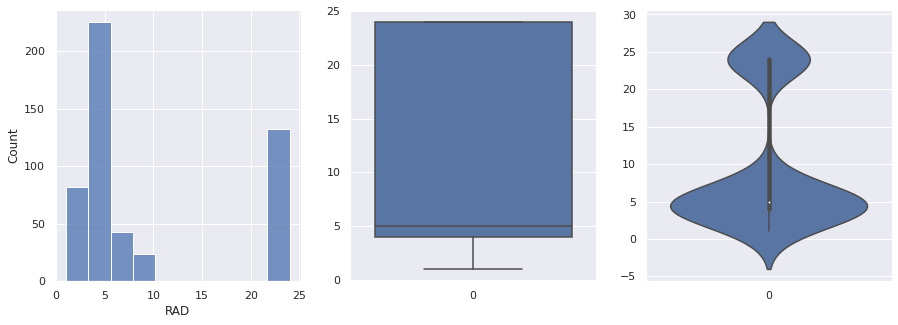

In [30]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.RAD, ax=axes[0])
sns.boxplot(data=x.RAD, ax=axes[1])
sns.violinplot(data=x.RAD, ax=axes[2])

#### PTRATIO

<AxesSubplot:>

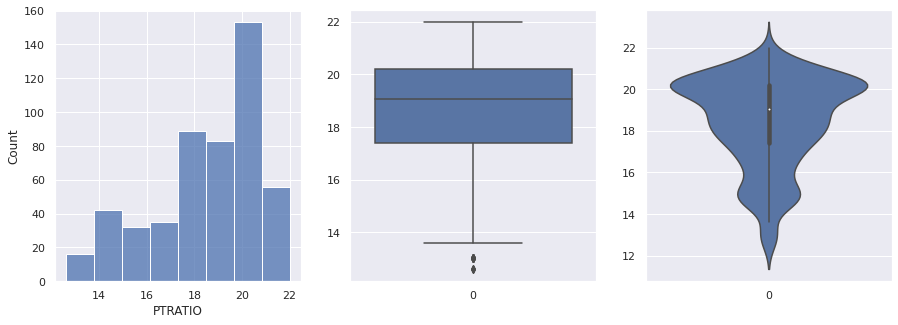

In [32]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.PTRATIO, bins=8, ax=axes[0])
sns.boxplot(data=x.PTRATIO, ax=axes[1])
sns.violinplot(data=x.PTRATIO, ax=axes[2])

In [33]:
Q1 = x.PTRATIO.quantile(0.25)
Q3 = x.PTRATIO.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.PTRATIO < BI) | (x.PTRATIO > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  2.964426877470356


#### B

<AxesSubplot:>

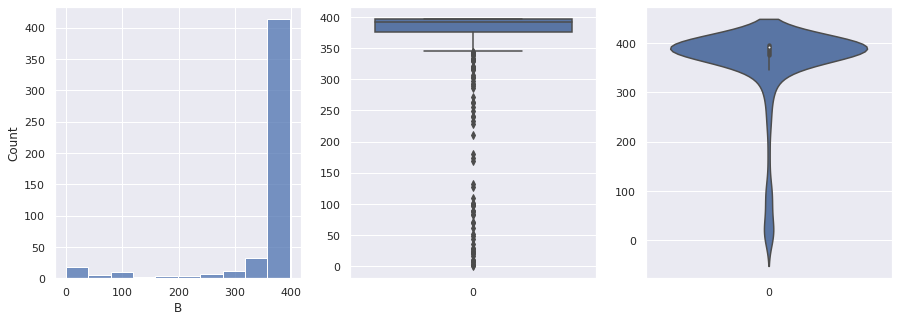

In [35]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.B, bins=10, ax=axes[0])
sns.boxplot(data=x.B, ax=axes[1])
sns.violinplot(data=x.B, ax=axes[2])

In [36]:
Q1 = x.B.quantile(0.25)
Q3 = x.B.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.B < BI) | (x.B > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  15.217391304347826


#### LSTAT

<AxesSubplot:>

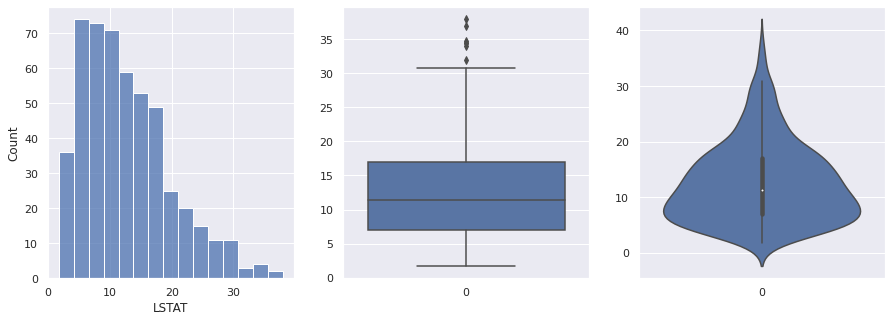

In [38]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=x.LSTAT, ax=axes[0])
sns.boxplot(data=x.LSTAT, ax=axes[1])
sns.violinplot(data=x.LSTAT, ax=axes[2])

In [39]:
Q1 = x.LSTAT.quantile(0.25)
Q3 = x.LSTAT.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = ((x.LSTAT < BI) | (x.LSTAT > BS))
print("Porcentaje de outliers: ", 100*out.sum()/out.count())

Porcentaje de outliers:  1.383399209486166


#### Análisis sobre LSTAT, RM